In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pdb

In [2]:
x = tf.placeholder(tf.float32, [None, 5]) # データ型を指定して領域確保，任意のデータ数を受け入れるためにNoneにする
w = tf.Variable(tf.zeros([5, 1])) # 最適化の対象となる「変数」
y = tf.matmul(x, w) # 行列の掛け算

In [3]:
t = tf.placeholder(tf.float32, [None, 1])
loss = tf.reduce_sum(tf.square(y - t)) # 損失関数，reduce_sum = Σ，square = ^2

In [4]:
train_step = tf.train.AdamOptimizer().minimize(loss) # 損失関数を最小にするwを決定

In [5]:
sess = tf.Session()
sess.run(tf.initialize_all_variables()) # Variableの値を初期化してトレーニングを開始

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [6]:
# --- トイデータの作成 ---
train_t = np.array([5.2, 5.7, 8.6, 14.9, 18.2, 20.4, 25.5, 26.4, 22.8, 17.5, 11.1, 6.6])
train_t = train_t.reshape([12, 1])

train_x = np.zeros([12, 5])
for row, month in enumerate(range(1, 13)):
    for col, n in enumerate(range(0, 5)):
        train_x[row][col] = month ** n

In [7]:
# --- トレーニング ---
i = 0
for _ in range(100000):
    i += 1
    sess.run(train_step, feed_dict={x:train_x, t:train_t})
    if (i % 10000 == 0):
        loss_val = sess.run(loss, feed_dict={x:train_x, t:train_t})
        print('Step: %d, Loss: %f' % (i, loss_val))

Step: 10000, Loss: 31.012833
Step: 20000, Loss: 29.292377
Step: 30000, Loss: 28.031116
Step: 40000, Loss: 27.911423
Step: 50000, Loss: 25.769745
Step: 60000, Loss: 24.764515
Step: 70000, Loss: 23.839672
Step: 80000, Loss: 22.970881
Step: 90000, Loss: 22.467999
Step: 100000, Loss: 21.445120


In [8]:
# --- パラメータの確認 ---
w_val = sess.run(w)
print(w_val)

[[ 3.7658305 ]
 [-1.5907954 ]
 [ 1.7854367 ]
 [-0.20124646]
 [ 0.00536682]]


In [9]:
def predict(x):
    """ 5次関数を仮定した回帰結果を予測する """
    result = 0.0
    for n in range(0, 5):
        result += w_val[n][0] * (x ** n)
    return result

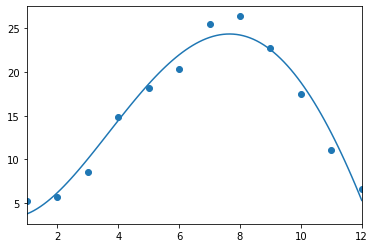

In [10]:
fig = plt.figure()
subplot = fig.add_subplot(1, 1, 1)
subplot.set_xlim(1, 12)
subplot.scatter(range(1, 13), train_t)
linex = np.linspace(1, 12, 100)
liney = predict(linex)
subplot.plot(linex, liney)